#__Part 1__

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 2. Scrape the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = pd.read_html(url)
print(len(df))
print(type(df))

3
<class 'list'>


In [4]:
df = df[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [5]:
# 3. To create the above data frame
#The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
#Only process the cells that have a assigned borough. Ignore cells with a borough that is Not assigned
df = df[df["Borough"] != "Not assigned"]
df
#More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
#If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
df.Neighbourhood.str.count("Not assigned").sum()

0

In [7]:
#In the last cell of your "notebook, use the .shape method to print the number of rows of your dataframe.

df.shape

(103, 3)

#__Part 2__

In [8]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [9]:
import geocoder # import geocoder

# initialize your variable to None

#lat_lng_coords = None

#postal_code = 'M5G'

# loop until you get the coordinates
#while(lat_lng_coords is None):
  #g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
 # lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

In [10]:
geo_df = pd.read_csv(r'C:\Users\hengo\Downloads\Geospatial_Coordinates.csv')
print(geo_df)

    Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
..          ...        ...        ...
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

[103 rows x 3 columns]


In [11]:
for col in geo_df.columns:
    print(col)

Postal Code
Latitude
Longitude


In [12]:
combined_df = df.join(geo_df.set_index('Postal Code'), on='Postal Code', how='inner')
combined_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
165,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [13]:
combined_df.shape

(103, 5)

#Part 3

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
to generate maps to visualize your neighborhoods and how they cluster together. 

In [14]:
import geocoder

In [15]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

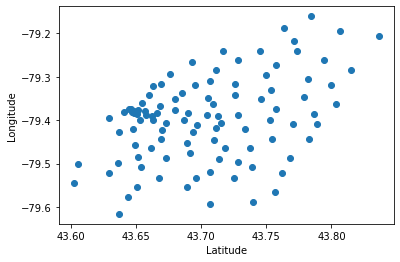

In [17]:
x = combined_df[['Latitude', 'Longitude']]
plt.scatter(x['Latitude'], x['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

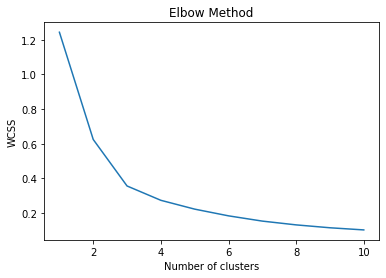

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [20]:
from geopy.geocoders import Nominatim 
import folium

In [21]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The coordinates of Toronto are 43.6534817, -79.3839347.


In [22]:
# Creating the map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for latitude, longitude, borough, neighbourhood in zip(combined_df['Latitude'], combined_df['Longitude'], combined_df['Borough'], combined_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_Toronto)  
    
map_Toronto

In [ ]:
# from pandas import DataFrame
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt 
%matplotlib inline 

[[ 43.63842235 -79.55741168]
 [ 43.65431045 -79.38859451]
 [ 43.77241051 -79.29126705]
 [ 43.73909782 -79.4710105 ]
 [ 43.77451213 -79.21056798]
 [ 43.77306927 -79.37998993]
 [ 43.6919377  -79.31884583]
 [ 43.65800285 -79.47713581]
 [ 43.7226207  -79.55085645]
 [ 43.70738478 -79.39966372]]


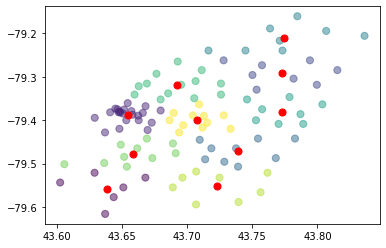

In [24]:
data = {'x': combined_df['Latitude'], 
        'y': combined_df['Longitude']
       }

df = DataFrame(data, columns = ['x','y'])

kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
x
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [25]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [26]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [27]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [28]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, ..., 3, 2, 2])

In [29]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.00729337,  3.98616174],
       [-2.02609927, -1.03283091],
       [ 1.97193538, -2.9563097 ],
       [ 0.98688437,  1.05758388]])

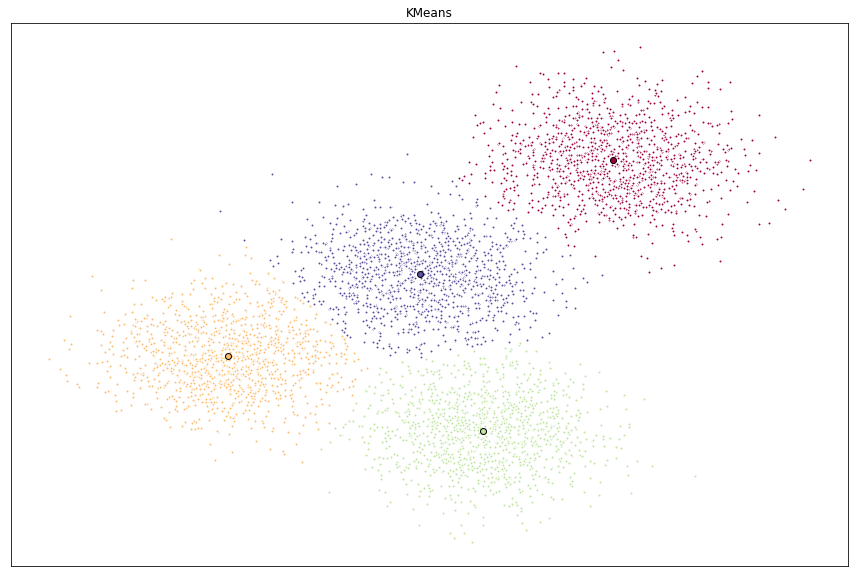

In [30]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()